JPEG (150, 150) RGB


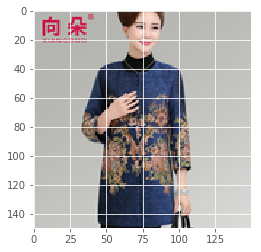

In [2]:
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

from PIL import Image

def plot_image(im):
    plt.imshow(np.asarray(im))
    
    
image = Image.open("existing material/Data/test_imgs/Coat_Female_3564.jpg")
print(image.format, image.size, image.mode)
plot_image(image)

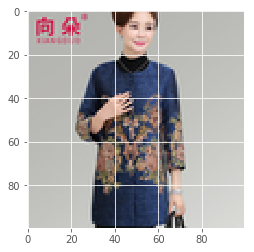

In [4]:
def crop_and_scale_image(im):
    """ Crops and scales a given image. 
        Args: 
            im (PIL Image) : image object to be cropped and scaled
        Returns: 
            (PIL Image) : cropped and scaled image object
    """
    width,height = im.size
    if width > height:
        diff = width - height
        box = diff/2, 0, width - (diff - diff/2), height
    else:
        diff = height - width
        box = 0, diff/2, width, height - (diff - diff/2)
    im = im.crop(box)
    toSize = 100,100
    im= im.resize(toSize, Image.ANTIALIAS)
    return im

plot_image(crop_and_scale_image(image))

In [7]:
import os
dname = "existing material/Data/test_imgs/"
im_paths = np.array([dname+fname for fname in os.listdir(dname) if fname.endswith(".jpg")])
print(len(im_paths))
P = np.random.permutation(len(im_paths))
split = 2000
fnames_tr, fnames_va, fnames_te = im_paths[P[:split]], im_paths[P[split:2*split]], im_paths[P[2*split:]]

8197


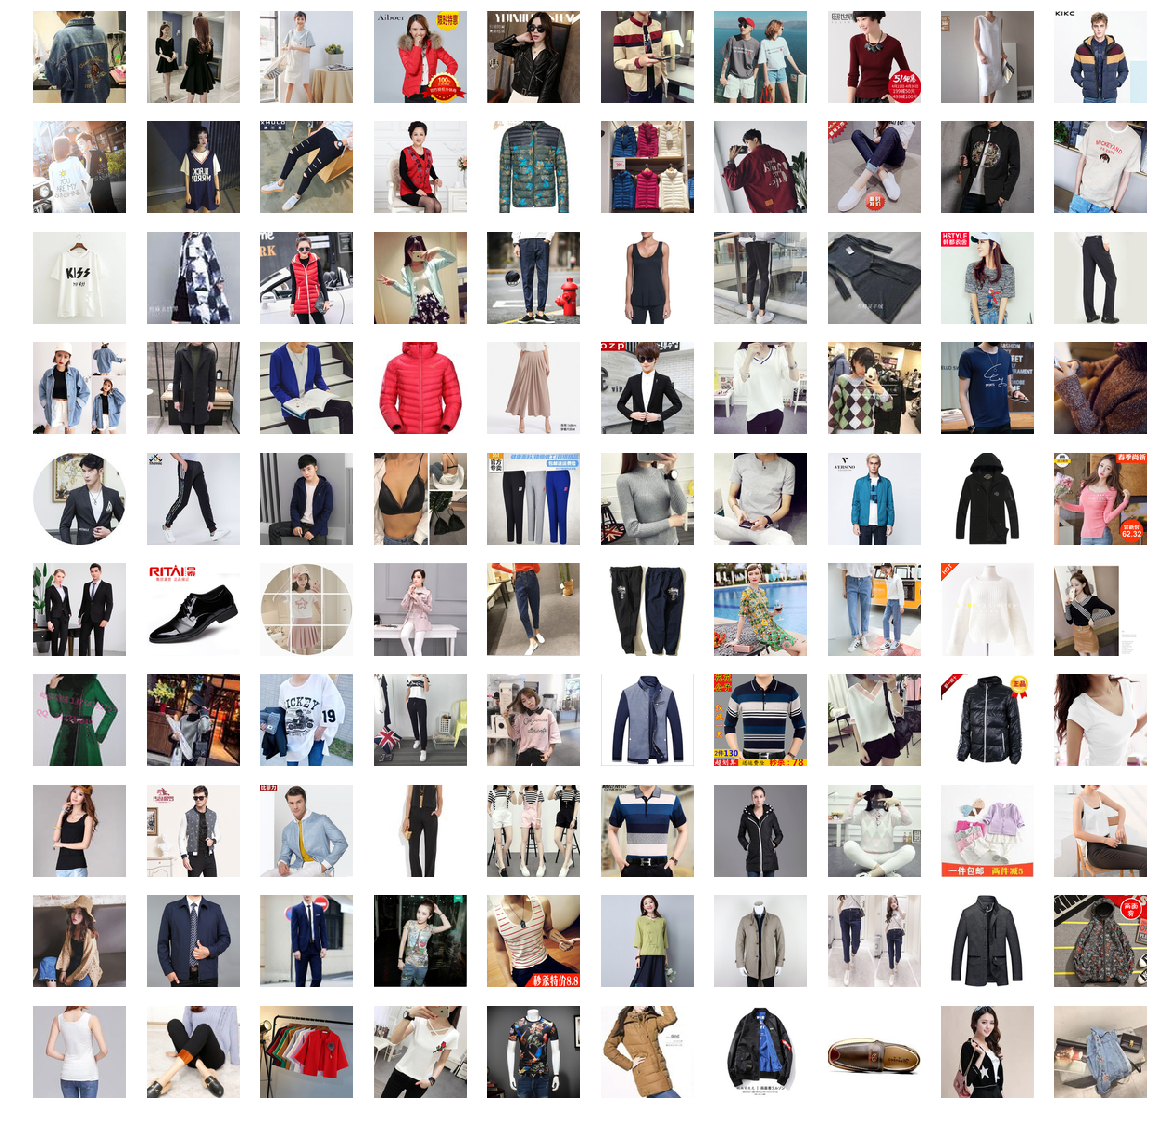

In [8]:
plt.figure(figsize=(20,20))
for i,fname in enumerate(fnames_tr[:100]):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plot_image(crop_and_scale_image(Image.open(fname)))

In [11]:
def fname_to_network_input(fname):
    """ Creates the input for a VGG network from the filename 
        Args: 
            fname (string) : the filename to be parsed
        Returns: 
            (numpy ndarray) : the array to be passed into the VGG network as a single example
    """
    im = Image.open(fname)
    im = crop_and_scale_image(im)
    if im.mode is not 'RGB':
        im = im.convert('RGB')
    npim = np.asarray(im)
    npim = np.rollaxis(npim, 2)
    return npim

print(fname_to_network_input("existing material/Data/test_imgs/Coat_Female_3564.jpg"))
print(type())

[[[179 179 178 ... 186 186 187]
  [180 179 180 ... 187 187 187]
  [180 180 179 ... 187 187 187]
  ...
  [195 195 195 ... 217 217 218]
  [195 195 195 ... 218 218 218]
  [196 196 196 ... 218 218 218]]

 [[180 180 179 ... 187 187 188]
  [180 180 179 ... 188 188 188]
  [179 179 179 ... 188 188 188]
  ...
  [196 196 196 ... 217 218 218]
  [196 196 196 ... 218 219 219]
  [195 196 197 ... 218 219 219]]

 [[176 174 174 ... 182 182 183]
  [175 175 175 ... 183 183 183]
  [174 175 174 ... 183 183 183]
  ...
  [191 191 191 ... 215 214 214]
  [191 191 191 ... 216 214 214]
  [191 192 192 ... 216 214 214]]]
